### Prepare phenoype for subtype analysis : relational task

- Build a scrubbing file to be used on subtype analysis for relational task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [4]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("relRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess2_relRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("relLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess2_relLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
10,HCP100206_sess2_relRL,13.0,219.0,0.098646,0.091387,HCP100206
24,HCP100307_sess2_relRL,0.0,232.0,0.108372,0.108372,HCP100307
38,HCP100408_sess2_relRL,0.0,232.0,0.113633,0.113633,HCP100408
52,HCP100610_sess2_relRL,0.0,232.0,0.184109,0.184109,HCP100610
66,HCP101006_sess2_relRL,0.0,232.0,0.146478,0.146478,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
11,HCP100206_sess2_relLR,0.0,232.0,0.118289,0.118289,HCP100206
25,HCP100307_sess2_relLR,0.0,232.0,0.098514,0.098514,HCP100307
39,HCP100408_sess2_relLR,0.0,232.0,0.145309,0.145309,HCP100408
53,HCP100610_sess2_relLR,15.0,217.0,0.170573,0.160610,HCP100610
67,HCP101006_sess2_relLR,13.0,219.0,0.152041,0.148402,HCP101006


In [5]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
10,HCP100206_sess2_relRL,0.098646,0.091387,HCP100206
24,HCP100307_sess2_relRL,0.108372,0.108372,HCP100307
38,HCP100408_sess2_relRL,0.113633,0.113633,HCP100408
52,HCP100610_sess2_relRL,0.184109,0.184109,HCP100610
66,HCP101006_sess2_relRL,0.146478,0.146478,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
11,HCP100206_sess2_relLR,0.118289,0.118289,HCP100206
25,HCP100307_sess2_relLR,0.098514,0.098514,HCP100307
39,HCP100408_sess2_relLR,0.145309,0.145309,HCP100408
53,HCP100610_sess2_relLR,0.170573,0.160610,HCP100610
67,HCP101006_sess2_relLR,0.152041,0.148402,HCP101006


In [6]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [7]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_relRL,0.098646,0.091387,HCP100206,HCP100206_sess2_relLR,0.118289,0.118289
1,HCP100307_sess2_relRL,0.108372,0.108372,HCP100307,HCP100307_sess2_relLR,0.098514,0.098514
2,HCP100408_sess2_relRL,0.113633,0.113633,HCP100408,HCP100408_sess2_relLR,0.145309,0.145309
3,HCP100610_sess2_relRL,0.184109,0.184109,HCP100610,HCP100610_sess2_relLR,0.170573,0.160610
4,HCP101006_sess2_relRL,0.146478,0.146478,HCP101006,HCP101006_sess2_relLR,0.152041,0.148402


In [8]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [9]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.098646,0.091387,0.118289,0.118289
1,HCP100307,0.108372,0.108372,0.098514,0.098514
2,HCP100408,0.113633,0.113633,0.145309,0.145309
3,HCP100610,0.184109,0.184109,0.170573,0.160610
4,HCP101006,0.146478,0.146478,0.152041,0.148402


In [10]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_relational.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.098646,0.091387,0.118289,0.118289,0.104838,0.108467
1,HCP100307,0.108372,0.108372,0.098514,0.098514,0.103443,0.103443
2,HCP100408,0.113633,0.113633,0.145309,0.145309,0.129471,0.129471
3,HCP100610,0.184109,0.184109,0.170573,0.160610,0.172360,0.177341
4,HCP101006,0.146478,0.146478,0.152041,0.148402,0.147440,0.149260


In [12]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,828.000000,828.000000,830.000000,830.000000,830.000000,830.000000
mean,0.147105,0.134541,0.151768,0.136577,0.135525,0.149387
std,0.060700,0.035907,0.074311,0.040547,0.036555,0.064105
min,0.061806,0.061806,0.063020,0.063020,0.062413,0.062413
25%,0.109573,0.108066,0.112192,0.109812,0.111075,0.113748
50%,0.135036,0.128769,0.139150,0.131066,0.129660,0.136786
75%,0.166013,0.155757,0.171159,0.158400,0.157043,0.168422
max,0.874215,0.292870,0.914675,0.630568,0.423294,0.872560


In [13]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

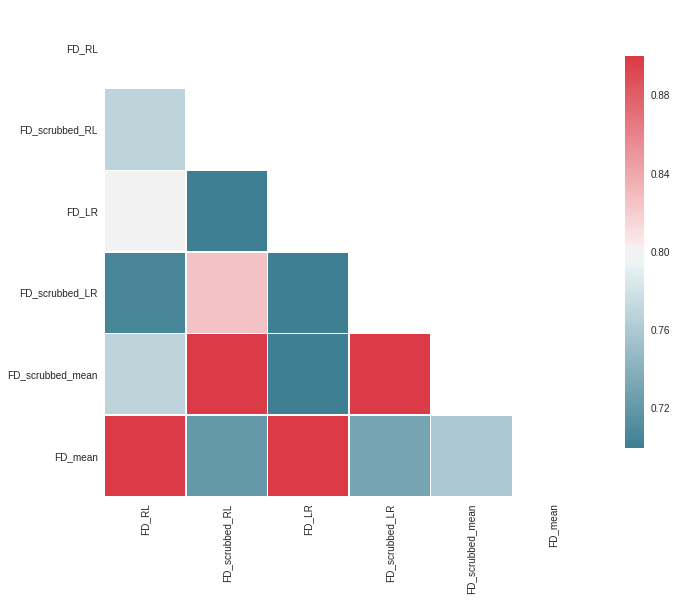

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

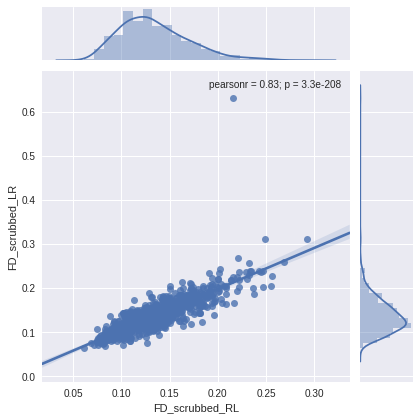

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

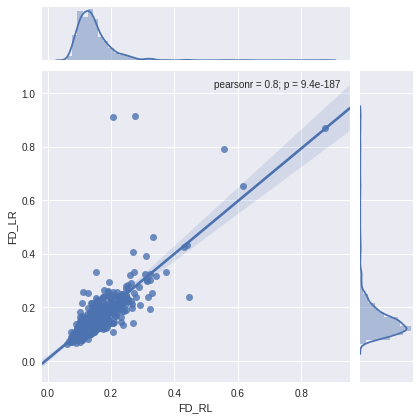

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [17]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [18]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Handedness','Twin_Stat','Zygosity','Mother_ID']],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Handedness,Twin_Stat,Zygosity,Mother_ID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100004,24,M,95,NotTwin,NotTwin,52259,-1.052260,-0.536775,1.187782,-0.657450,-0.098656,-0.279903,0.608886,-1.532028,0.209060
1,HCP100206,27,M,65,NotTwin,NotTwin,56037,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
2,HCP100307,27,F,95,Twin,NotMZ,51488,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
3,HCP100408,33,M,55,Twin,MZ,51730,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
4,HCP100610,27,M,85,Twin,NotMZ,52813,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399


In [19]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [20]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject       932
Age_in_Yrs    932
Gender        932
Handedness    932
Twin_Stat     932
Zygosity      932
Mother_ID     932
cluster_1     932
cluster_2     932
cluster_3     932
cluster_4     932
cluster_5     932
cluster_6     932
cluster_7     932
cluster_8     932
cluster_9     932
dtype: int64

In [21]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Handedness,Twin_Stat,Zygosity,Mother_ID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100004,24,1,95,NotTwin,NotTwin,52259,-1.052260,-0.536775,1.187782,-0.657450,-0.098656,-0.279903,0.608886,-1.532028,0.209060
1,HCP100206,27,1,65,NotTwin,NotTwin,56037,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
2,HCP100307,27,2,95,Twin,NotMZ,51488,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
3,HCP100408,33,1,55,Twin,MZ,51730,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
4,HCP100610,27,1,85,Twin,NotMZ,52813,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399


In [23]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [24]:
merged_pheno_scrub.count()

                    830
FD_RL               828
FD_scrubbed_RL      828
FD_LR               830
FD_scrubbed_LR      830
FD_scrubbed_mean    830
FD_mean             830
Subject             804
Age_in_Yrs          804
Gender              804
Handedness          804
Twin_Stat           804
Zygosity            804
Mother_ID           804
cluster_1           804
cluster_2           804
cluster_3           804
cluster_4           804
cluster_5           804
cluster_6           804
cluster_7           804
cluster_8           804
cluster_9           804
dtype: int64

In [25]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [26]:
merged_pheno_scrub_clean.count()

                    802
FD_RL               802
FD_scrubbed_RL      802
FD_LR               802
FD_scrubbed_LR      802
FD_scrubbed_mean    802
FD_mean             802
Subject             802
Age_in_Yrs          802
Gender              802
Handedness          802
Twin_Stat           802
Zygosity            802
Mother_ID           802
cluster_1           802
cluster_2           802
cluster_3           802
cluster_4           802
cluster_5           802
cluster_6           802
cluster_7           802
cluster_8           802
cluster_9           802
dtype: int64

In [27]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,Mother_ID,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100206,0.098646,0.091387,0.118289,0.118289,0.104838,0.108467,HCP100206,27.0,1.0,...,56037.0,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
1,HCP100307,0.108372,0.108372,0.098514,0.098514,0.103443,0.103443,HCP100307,27.0,2.0,...,51488.0,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
2,HCP100408,0.113633,0.113633,0.145309,0.145309,0.129471,0.129471,HCP100408,33.0,1.0,...,51730.0,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
3,HCP100610,0.184109,0.184109,0.170573,0.160610,0.172360,0.177341,HCP100610,27.0,1.0,...,52813.0,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
4,HCP101006,0.146478,0.146478,0.152041,0.148402,0.147440,0.149260,HCP101006,35.0,2.0,...,51283.0,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365
5,HCP101107,0.209471,0.110303,0.145773,0.086654,0.098479,0.177622,HCP101107,22.0,1.0,...,51969.0,-0.236587,-0.055247,0.202737,0.108271,-0.816365,0.164527,1.259271,0.350204,0.123138
6,HCP101309,0.076072,0.076072,0.086923,0.086923,0.081497,0.081497,HCP101309,29.0,1.0,...,52385.0,2.460648,-0.639590,-1.056096,-0.458966,-0.579394,-0.306816,-0.491635,0.396082,-0.336725
7,HCP101410,0.150343,0.150343,0.160767,0.160767,0.155555,0.155555,HCP101410,29.0,1.0,...,52198.0,-0.737608,-0.286803,-0.213357,0.012024,-0.830777,-0.408648,0.020646,0.388261,0.779067
8,HCP101915,0.087045,0.087045,0.091963,0.091963,0.089504,0.089504,HCP101915,35.0,2.0,...,51977.0,1.461551,-1.096840,-0.838275,1.016038,0.083408,-0.056452,0.159738,1.173397,-0.532920
9,HCP102008,0.150372,0.150372,0.148905,0.148905,0.149639,0.149639,HCP102008,24.0,1.0,...,52018.0,-0.891228,0.787911,-0.101854,0.511281,0.198667,0.152497,-0.006320,0.653874,0.721998


In [29]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_relational_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_relational.csv"), index=False)